In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [83]:
sns.set()

In [84]:
df = pd.read_csv('data.csv.xls')

In [85]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [87]:
df['country'].unique()

array(['USA'], dtype=object)

In [88]:
df = df.drop(['country'], axis=1)
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042


In [89]:
df.shape

(4600, 17)

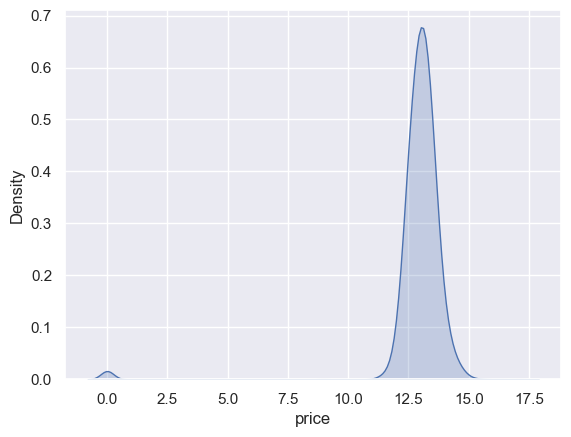

In [90]:
sns.kdeplot(df['price'].apply(np.log1p), fill=True)
plt.show()

In [91]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042


In [92]:
df['price_zscore'] = zscore(df['price'])
df['sqft_living_zscre'] = zscore(df['sqft_living'])
df['sqft_lot_zscre'] = zscore(df['sqft_lot'])
df['sqft_above_zscre'] = zscore(df['sqft_above'])
df['sqft_basement_zscre'] = zscore(df['sqft_basement'])

df = df[(df.price_zscore < 3) & (df.price_zscore > -3)]
df = df[(df.sqft_living_zscre < 3) & (df.sqft_living_zscre > -3)]
df = df[(df.sqft_lot_zscre < 3) & (df.sqft_lot_zscre > -3)]
df = df[(df.sqft_above_zscre < 3) & (df.sqft_above_zscre > -3)]
df = df[(df.sqft_basement_zscre < 3) & (df.sqft_basement_zscre > -3)]

In [93]:
df.drop(columns=['price_zscore','sqft_living_zscre','sqft_lot_zscre','sqft_above_zscre','sqft_basement_zscre'], inplace=True)

In [94]:
df.shape

(4412, 17)

In [95]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.412000e+03,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,5.148384e+05,3.370580,2.115764,2050.750907,10721.808250,1.504873,0.004986,0.205122,3.455802,1759.768132,290.982774,1970.312103,813.176791
std,2.883499e+05,0.889382,0.726956,804.787880,12730.880029,0.538823,0.070446,0.713151,0.677785,756.913651,419.827579,29.810081,980.236717
min,0.000000e+00,0.000000,0.000000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.199500e+05,3.000000,1.750000,1440.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1950.000000,0.000000
50%,4.530000e+05,3.000000,2.250000,1940.000000,7500.000000,1.500000,0.000000,0.000000,3.000000,1560.000000,0.000000,1974.000000,0.000000
75%,6.353250e+05,4.000000,2.500000,2550.000000,10404.500000,2.000000,0.000000,0.000000,4.000000,2230.000000,600.000000,1996.000000,1999.000000
max,2.199900e+06,9.000000,5.750000,5000.000000,120661.000000,3.500000,1.000000,4.000000,5.000000,4410.000000,1700.000000,2014.000000,2014.000000


In [96]:
df.drop(columns=["statezip","street",'date','city'], inplace=True)

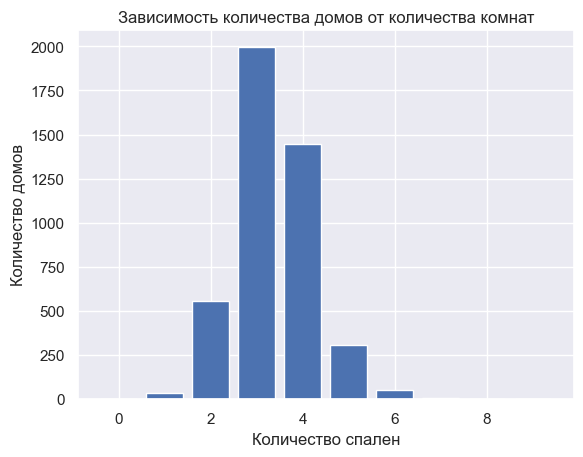

In [97]:
x = df.bedrooms.value_counts().index
y = df.bedrooms.value_counts().values
plt.bar(x, y)
plt.xlabel('Количество спален')
plt.ylabel('Количество домов')
plt.title('Зависимость количества домов от количества комнат')
plt.show()

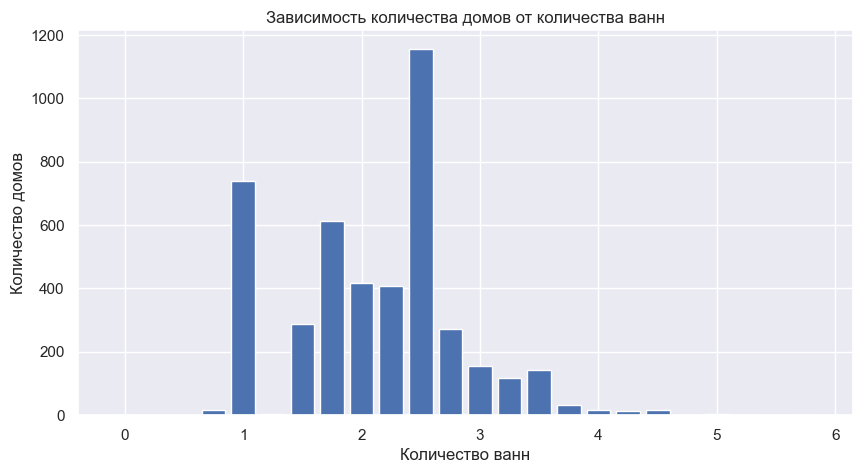

In [98]:
x = df.bathrooms.value_counts().index
y = df.bathrooms.value_counts().values
plt.figure(figsize=(10, 5))
plt.bar(x, y, width=0.2)
plt.xlabel('Количество ванн')
plt.ylabel('Количество домов')
plt.title('Зависимость количества домов от количества ванн')
plt.show()

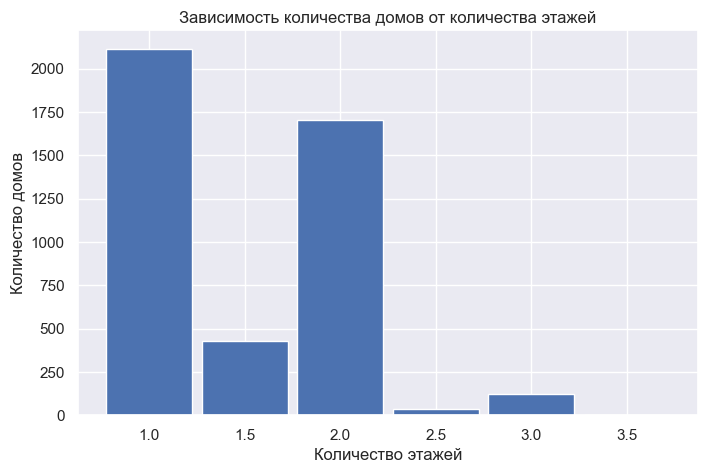

In [99]:
x = df.floors.value_counts().index
y = df.floors.value_counts().values
plt.figure(figsize=(8, 5))
plt.bar(x, y, width=0.45)
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
plt.title('Зависимость количества домов от количества этажей')
plt.show()

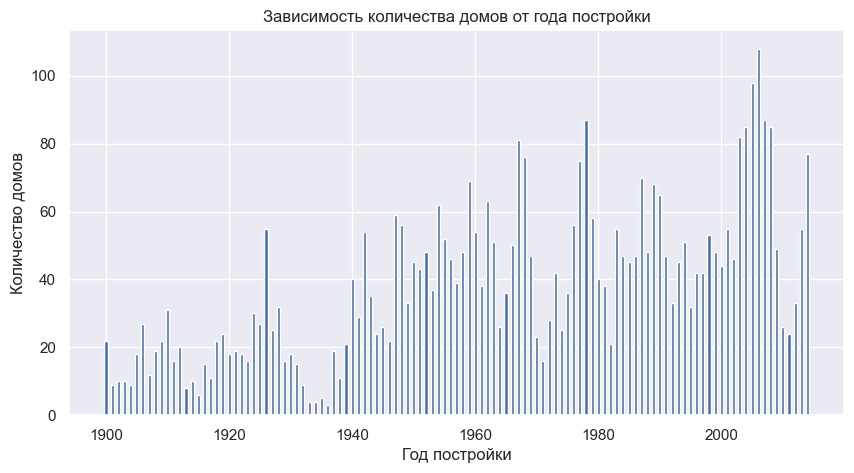

In [100]:
x = df.yr_built.value_counts().index
y = df.yr_built.value_counts().values
plt.figure(figsize=(10, 5))
plt.bar(x, y, width=0.5)
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')
plt.title('Зависимость количества домов от года постройки')
plt.show()

In [101]:
px.scatter(
    df,
    y="sqft_living",
    x="price",
    title="Жилая площадь vs Цена",
)

In [102]:
px.scatter(
    df,
    y="sqft_lot",
    x="price",
    title="Площадь участка vs Цена",
)

In [103]:
px.scatter(
    df,
    y="sqft_above",
    x="price",
    title="Above Square Footage vs Цена",
)

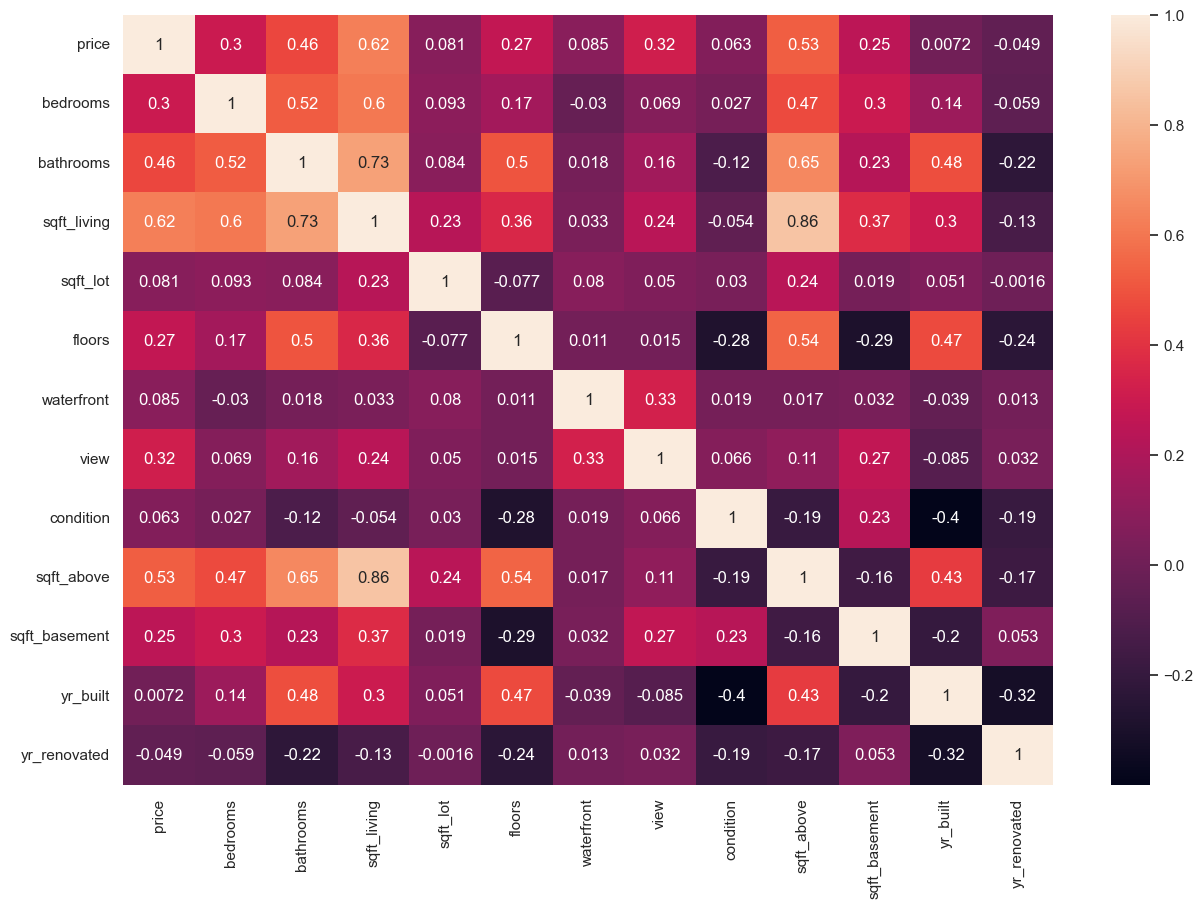

In [104]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True);

### Разделение данных

In [105]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Стандартизация

In [106]:
sc_X = StandardScaler()
X_train[:, 0:5] = sc_X.fit_transform(X_train[:, 0:5])
X_test[:, 0:5] = sc_X.transform(X_test[:, 0:5])
X_train[:, 6:11] = sc_X.fit_transform(X_train[:, 6:11])
X_test[:, 6:11] = sc_X.transform(X_test[:, 6:11])

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1)).flatten()

In [107]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0


### Linear Regression

In [113]:
lr = LinearRegression()

In [114]:
lr.fit(X_train, y_train)

LinearRegression()

In [115]:
y_pred = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
r2_lr = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Test Score:", r2_lr)

print("MSE:", mse_lr)

R2 Test Score: 0.4654985614799084
MSE: 40289290640.30464


### Random Forest 

In [116]:
rdm_frst = RandomForestRegressor(n_estimators = 200, random_state = 0)
rdm_frst.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [117]:
y_pred = rdm_frst.predict(X_test)
mse_rdm_frst = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
r2_rdm_frst = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Test Score:", r2_rdm_frst)

print("MSE:", mse_rdm_frst)

R2 Test Score: 0.42727702846711035
MSE: 43170327698.94061
